<a href="https://colab.research.google.com/github/ConorD28/Baseball/blob/main/R_Data_Manipulation_and_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install/Load Packages**

In [ ]:
install.packages("plyr")
install.packages("dplyr")
install.packages("devtools")
install.packages("DT")
install.packages("ggrepel")
install.packages("ggthemes")
install.packages("gridExtra")
install.packages("janitor")
install.packages("plotly")
install.packages("stringr")
install.packages("tidyr")
install.packages("tidyselect")
install.packages("tidyverse")
install.packages("data.table")
install.packages("reactable")
install.packages("ggpubr")

library(plyr)
library(dplyr)
library(devtools)
library(DT)
library(ggplot2)
library(ggrepel)
library(ggthemes)
library(gridExtra)
library(janitor)
library(plotly)
library(stringr)
library(tidyr)
library(tidyselect)
library(tidyverse)
library(data.table)
library(reactable)
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ 

# **Manipulating Data**

In [ ]:
TestTrackMan = fread('TestTrackMan.csv')

In [ ]:
PitcherData <- subset(TestTrackMan, select = c(Pitcher, TaggedPitchType, RelSpeed)) #c includes cols while -c removes them

In [ ]:
unique(PitcherData$Pitcher)

[1] "Foster, Larry"       "Grimes, Barry"       "Sentz, Carson"      
 [4] "Kinder, Terry"       "Nichols, Jimmy"      "Watson, Alex"       
 [7] "Jones, Tory"         "De Los Santos, Dave" "Manning, Corey"     
[10] "Alton, Jared"        "Bonds, Anthony"      "Saunders, Colson"   
[13] "Birton, Manny"       "Murphy, Mark"        "Thompson, Clark"    
[16] "Loop, Ned"           "George, Ryan"

In [ ]:
PitcherData <- PitcherData[PitcherData$Pitcher == 'Foster, Larry'] #only include
PitcherData <- PitcherData[PitcherData$Pitcher != 'Foster, Larry'] #exclude
PitcherData <- PitcherData[!is.na(PitcherData$Pitcher)] #remove rows that contain NA

In [ ]:
PitcherData <- subset(TestTrackMan, select = c(Pitcher, TaggedPitchType, RelSpeed)) #c includes cols while -c removes them
unique(PitcherData$TaggedPitchType)

[1] "Fastball"  "Sinker"    "ChangeUp"  "Slider"    "Curveball"

In [ ]:
PitcherData$is.fastball <- PitcherData$TaggedPitchType

In [ ]:
PitcherData$is.fastball[PitcherData$is.fastball == 'Fastball'] <- 'yes'
PitcherData$is.fastball[PitcherData$is.fastball == 'Sinker'] <- 'yes'
PitcherData$is.fastball[PitcherData$is.fastball == 'ChangeUp'] <- 'no'
PitcherData$is.fastball[PitcherData$is.fastball == 'Slider'] <- 'no'
PitcherData$is.fastball[PitcherData$is.fastball == 'Curveball'] <- 'no'

In [ ]:
PitcherData <- PitcherData[PitcherData$is.fastball == 'yes']

In [ ]:
PitcherData1 <- PitcherData[, .(
  MPH_Sum = sum(RelSpeed, na.rm = TRUE),
  MPH_Max = max(RelSpeed, na.rm = TRUE),
  MPH_Mean = mean(RelSpeed, na.rm = TRUE)),
  by = .(Pitcher, TaggedPitchType)]
PitcherData1

Pitcher,TaggedPitchType,MPH_Sum,MPH_Max,MPH_Mean
<chr>,<chr>,<dbl>,<dbl>,<dbl>
"Foster, Larry",Fastball,3276.11228,92.45343,91.00312
"Foster, Larry",Sinker,79.84393,79.84393,79.84393
"Grimes, Barry",Fastball,369.57649,93.18959,92.39412
"Sentz, Carson",Fastball,1661.08528,93.67495,92.28252
"Kinder, Terry",Fastball,545.79583,91.28179,90.96597
"Nichols, Jimmy",Fastball,1459.81501,93.81489,91.23844
"Watson, Alex",Fastball,446.61206,91.40873,89.32241
"Jones, Tory",Fastball,1713.18764,92.29826,90.16777
"De Los Santos, Dave",Fastball,270.62876,90.50010,90.20959


In [ ]:
PitcherData1 <- PitcherData[, .(
  MPH_Sum = sum(RelSpeed, na.rm = TRUE),
  MPH_Max = max(RelSpeed, na.rm = TRUE),
  MPH_Mean = mean(RelSpeed, na.rm = TRUE)),
  by = .(Pitcher)]
PitcherData1

Pitcher,MPH_Sum,MPH_Max,MPH_Mean
<chr>,<dbl>,<dbl>,<dbl>
"Foster, Larry",3355.9562,92.45343,90.70152
"Grimes, Barry",369.5765,93.18959,92.39412
"Sentz, Carson",1661.0853,93.67495,92.28252
"Kinder, Terry",545.7958,91.28179,90.96597
"Nichols, Jimmy",1459.8150,93.81489,91.23844
"Watson, Alex",446.6121,91.40873,89.32241
"Jones, Tory",1713.1876,92.29826,90.16777
"De Los Santos, Dave",270.6288,90.50010,90.20959
"Manning, Corey",1101.3055,94.70165,91.77546


In [ ]:
PitcherData$RelSpeed <- round(PitcherData$RelSpeed, digits = 1)

In [ ]:
PitcherData2 <- PitcherData %>% group_by(Pitcher, TaggedPitchType, RelSpeed)%>%tally()
PitcherData2

Pitcher,TaggedPitchType,RelSpeed,n
<chr>,<chr>,<dbl>,<int>
"Alton, Jared",Fastball,88.0,1
"Alton, Jared",Fastball,88.1,2
"Alton, Jared",Fastball,88.3,2
"Alton, Jared",Fastball,88.4,1
"Alton, Jared",Fastball,88.7,1
"Alton, Jared",Fastball,89.2,1
"Alton, Jared",Fastball,89.4,2
"Birton, Manny",Fastball,89.2,1
"Birton, Manny",Fastball,89.5,1


In [ ]:
colnames(TestTrackMan)

[1] "PitchNo"                        "Date"                          
  [3] "Time"                           "PAofInning"                    
  [5] "PitchofPA"                      "Pitcher"                       
  [7] "PitcherId"                      "PitcherThrows"                 
  [9] "PitcherTeam"                    "Batter"                        
 [11] "BatterId"                       "BatterSide"                    
 [13] "BatterTeam"                     "PitcherSet"                    
 [15] "Inning"                         "Top.Bottom"                    
 [17] "Outs"                           "Balls"                         
 [19] "Strikes"                        "TaggedPitchType"               
 [21] "AutoPitchType"                  "PitchCall"                     
 [23] "KorBB"                          "PlayResult"                    
 [25] "OutsOnPlay"                     "RunsScored"                    
 [27] "Notes"                          "RelSpeed"                      
 [29] "VertRelAngle"                   "HorzRelAngle"                  
 [31] "SpinRate"                       "SpinAxis"                      
 [33] "Tilt"                           "RelHeight"                     
 [35] "RelSide"                        "Extension"                     
 [37] "VertBreak"                      "InducedVertBreak"              
 [39] "HorzBreak"                      "PlateLocHeight"                
 [41] "PlateLocSide"                   "ZoneSpeed"                     
 [43] "VertApprAngle"                  "HorzApprAngle"                 
 [45] "ZoneTime"                       "ExitSpeed"                     
 [47] "Angle"                          "Direction"                     
 [49] "HitSpinRate"                    "PositionAt110X"                
 [51] "PositionAt110Y"                 "PositionAt110Z"                
 [53] "Distance"                       "LastTrackedDistance"           
 [55] "Bearing"                        "HangTime"                      
 [57] "pfxx"                           "pfxz"                          
 [59] "x0"                             "y0"                            
 [61] "z0"                             "vx0"                           
 [63] "vy0"                            "vz0"                           
 [65] "ax0"                            "ay0"                           
 [67] "az0"                            "HomeTeam"                      
 [69] "AwayTeam"                       "Stadium"                       
 [71] "Level"                          "League"                        
 [73] "GameID"                         "PitchUID"                      
 [75] "EffectiveVelo"                  "MaxHeight"                     
 [77] "MeasuredDuration"               "SpeedDrop"                     
 [79] "PitchLastMeasuredX"             "PitchLastMeasuredY"            
 [81] "PitchLastMeasuredZ"             "ContactPositionX"              
 [83] "ContactPositionY"               "ContactPositionZ"              
 [85] "GameUID"                        "HitType"                       
 [87] "TaggedHitType"                  "UTCDate"                       
 [89] "UTCTime"                        "LocalDateTime"                 
 [91] "UTCDateTime"                    "AutoHitType"                   
 [93] "System"                         "HomeTeamForeignID"             
 [95] "AwayTeamForeignID"              "GameForeignID"                 
 [97] "Catcher"                        "CatcherId"                     
 [99] "CatcherThrows"                  "CatcherTeam"                   
[101] "PlayID"                         "PitchTrajectoryXc0"            
[103] "PitchTrajectoryXc1"             "PitchTrajectoryXc2"            
[105] "PitchTrajectoryYc0"             "PitchTrajectoryYc1"            
[107] "PitchTrajectoryYc2"             "PitchTrajectoryZc0"            
[109] "PitchTrajectoryZc1"             "PitchTrajectoryZc2"            
[111] "HitSpinAxis"                    "Hi

In [ ]:
table(TestTrackMan$TaggedPitchType) #how many times each value appears


 ChangeUp Curveball  Fastball    Sinker    Slider 
       57         2       172         2       146 

In [ ]:
New_DataSet <- TestTrackMan%>%filter(TaggedPitchType == 'Fastball')
New_DataSet <- TestTrackMan%>%filter(TaggedPitchType %in% c('Fastball', 'Sinker'))

In [ ]:
LHP <- TestTrackMan[TestTrackMan$PitcherThrows == 'Left']
RHP <- TestTrackMan[TestTrackMan$PitcherThrows == 'Right']
Total <- rbind(LHP, RHP) #attach to bottom of df - cols stay same

In [ ]:
LHP_Velo <- LHP[, .(MPH = mean(RelSpeed, na.rm = TRUE,
  by = .(PitcherThrows)))]

RHP_Velo <- RHP[, .(MPH = mean(RelSpeed, na.rm = TRUE,
by = .(PitcherThrows)))]

In [ ]:
Velos <- cbind(LHP_Velo, RHP_Velo) #attatch to side of df - creates more cols

In [ ]:
Team <- subset(TestTrackMan, select = c(Pitcher, PitcherTeam))
Throws <- subset(TestTrackMan, select = c(Pitcher, PitcherThrows))

In [ ]:
Team <- head(Team, 1)
Throws <- head(Throws, 1)
Team_Throws <- merge(Team, Throws) #creates additional col (doesn't add ID)
Team_Throws

Pitcher,PitcherTeam,PitcherThrows
<chr>,<chr>,<chr>
"Foster, Larry",Great North Coyotes,Left


# **Visualize**

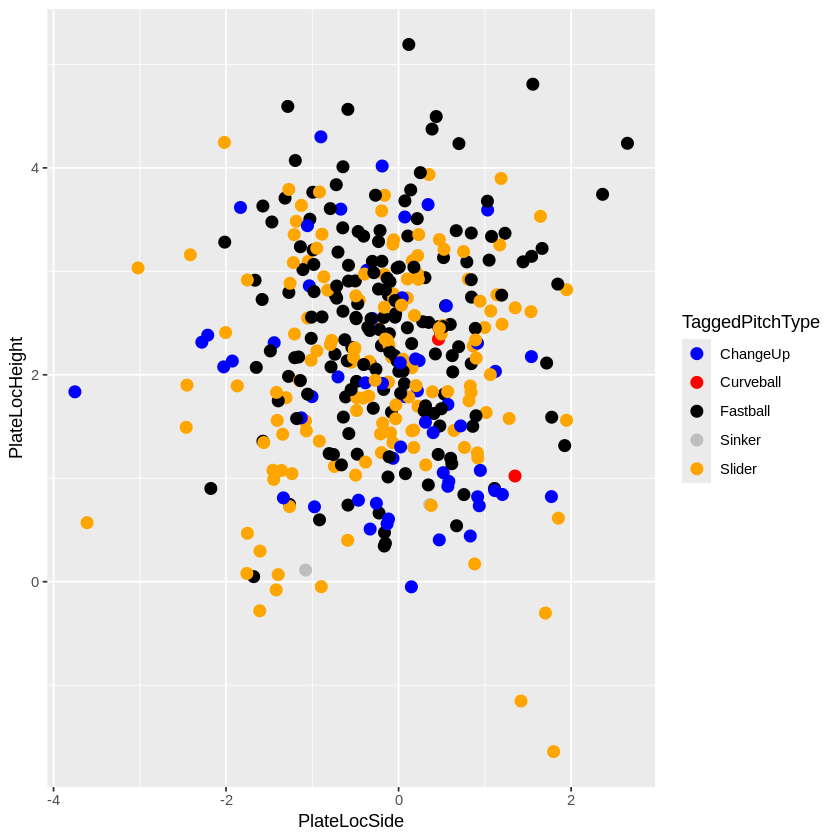

In [ ]:
ggplot(TestTrackMan, aes(x = PlateLocSide, y = PlateLocHeight)) + geom_point(aes(color = TaggedPitchType), size = 3) +
  scale_color_manual(values = c(ChangeUp = 'blue', Fastball = 'black', Slider = 'Orange', Curveball = 'red',
  Cutter = 'green', Sinker = 'grey', Splitter = 'purple'))

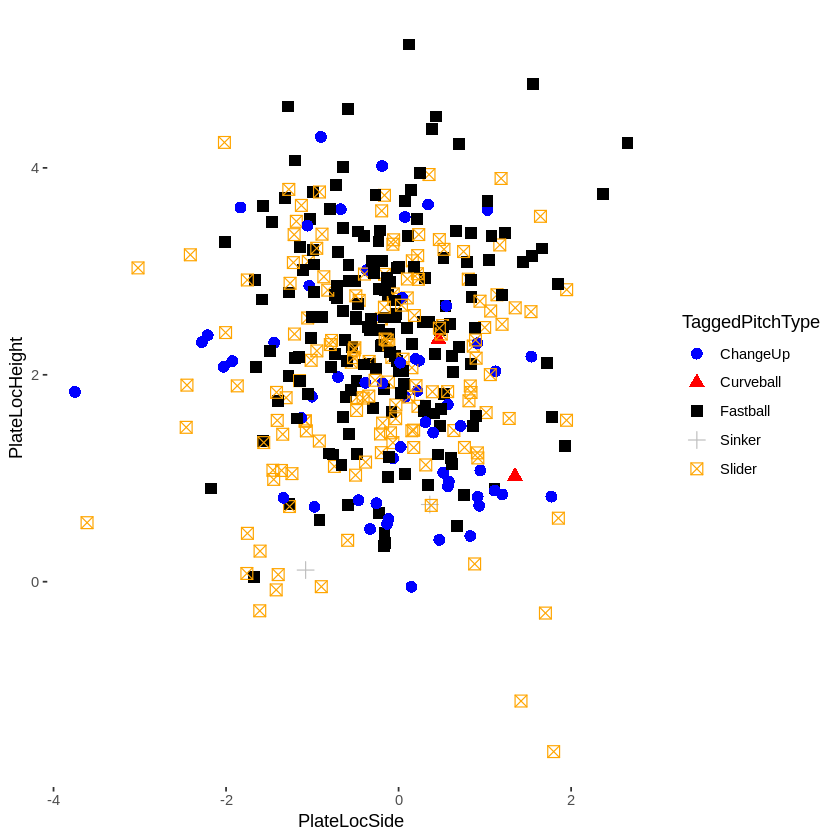

In [ ]:
ggplot(TestTrackMan, aes(x = PlateLocSide, y = PlateLocHeight)) + geom_point(aes(shape = TaggedPitchType, color = TaggedPitchType), size = 3) +
  scale_color_manual(values = c(ChangeUp = 'blue', Fastball = 'black', Slider = 'Orange', Curveball = 'red',
  Cutter = 'green', Sinker = 'grey', Splitter = 'purple')) + theme(panel.background = element_blank())

**Strikezone**

In [ ]:
Left <- -8.5/12
Right <- 8.5/12
Bottom <- 18.29/12
Top <- 44.08/12

Width = (Right - Left)/3
Height <- (Top - Bottom)/3

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”


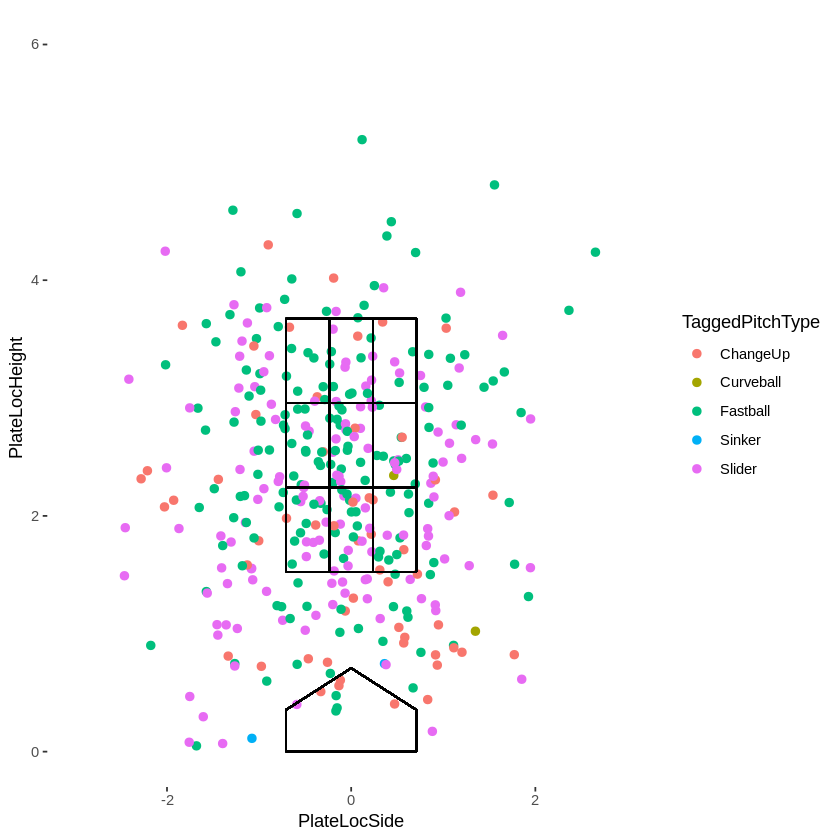

In [ ]:
ggplot(TestTrackMan, aes(x = PlateLocSide, y = PlateLocHeight)) + geom_point(aes(color = TaggedPitchType), size = 2) +
  xlim(-3, 3) + ylim(0, 6) + #Pitches
  #The Box:
  geom_segment(x = Left, y = Bottom, xend = Right, yend = Bottom) +
  geom_segment(x = Left, y = Top, xend = Right, yend = Top) +
  geom_segment(x = Left, y = Bottom, xend = Left, yend = Top) +
  geom_segment(x = Right, y = Bottom, xend = Right, yend = Top) +
  #Inner horizontal lines:
  geom_segment(x = Left, y = Bottom + Height, xend = Right, yend = Bottom + Height) +
  geom_segment(x = Left, y = Top - Height, xend = Right, yend = Top - Height) +
  #Inner vertical lines:
  geom_segment(x = Left + Width, y = Bottom, xend = Left + Width, yend = Top) +
  geom_segment(x = Right - Width, y = Bottom, xend = Right - Width, yend = Top) +
  #Plate:
  geom_segment(x = Left, y = 0, xend = Right, yend = 0) +
  geom_segment(x = Left, y = 0, xend = Left, yend = 4.25/12) +
  geom_segment(x = Left, y = 4.25/12, xend = 0, yend = 8.5/12) +
  geom_segment(x = Right, y = 4.25/12, xend = Right, yend = 0) +
  geom_segment(x = 0, y = 8.5/12, xend = Right, yend = 4.25/12) + theme(panel.background = element_blank())

# **Visualize 2**

In [ ]:
Left <- -8.5/12
Right <- 8.5/12
Bottom <- 18.29/12
Top <- 44.08/12

Width = (Right - Left)/3
Height <- (Top - Bottom)/3

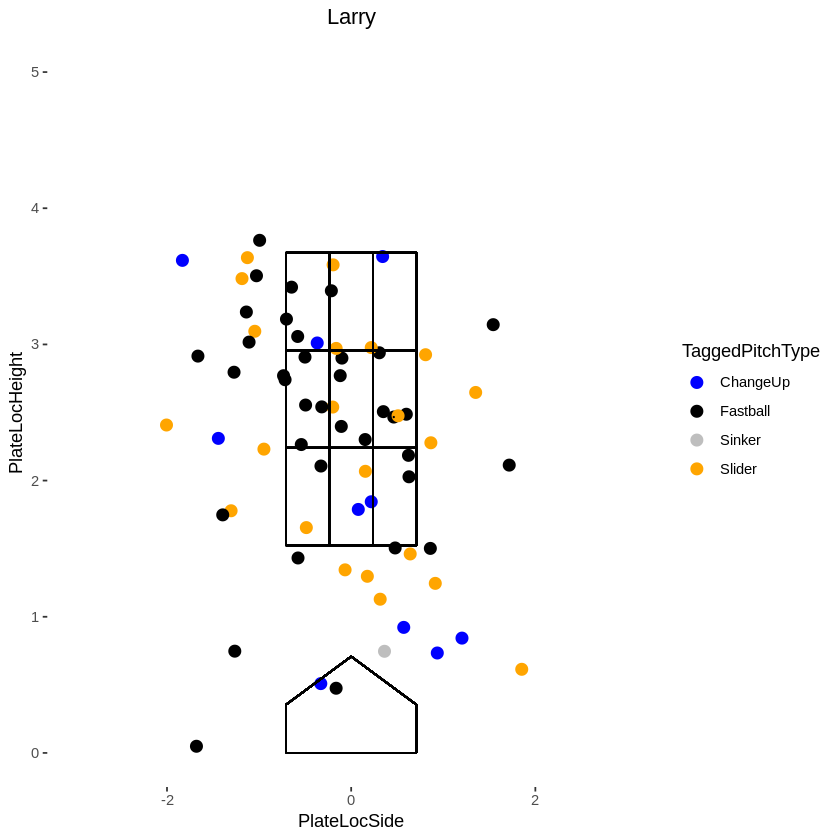

In [ ]:
Larry <- TestTrackMan %>% filter(Pitcher == 'Foster, Larry') %>% ggplot(TestTrackMan,  mapping = aes(x = PlateLocSide, y = PlateLocHeight)) + geom_point(aes(color = TaggedPitchType), size = 3) +
  scale_color_manual(values = c(ChangeUp = 'blue', Fastball = 'black', Slider = 'Orange', Curveball = 'red',
  Cutter = 'green', Sinker = 'grey', Splitter = 'purple')) + geom_point(aes(color = TaggedPitchType), size = 0) +
  xlim(-3, 3) + ylim(0, 5) + #Pitches
  #The Box:
  geom_segment(x = Left, y = Bottom, xend = Right, yend = Bottom) +
  geom_segment(x = Left, y = Top, xend = Right, yend = Top) +
  geom_segment(x = Left, y = Bottom, xend = Left, yend = Top) +
  geom_segment(x = Right, y = Bottom, xend = Right, yend = Top) +
  #Inner horizontal lines:
  geom_segment(x = Left, y = Bottom + Height, xend = Right, yend = Bottom + Height) +
  geom_segment(x = Left, y = Top - Height, xend = Right, yend = Top - Height) +
  #Inner vertical lines:
  geom_segment(x = Left + Width, y = Bottom, xend = Left + Width, yend = Top) +
  geom_segment(x = Right - Width, y = Bottom, xend = Right - Width, yend = Top) +
  #Plate:
  geom_segment(x = Left, y = 0, xend = Right, yend = 0) +
  geom_segment(x = Left, y = 0, xend = Left, yend = 4.25/12) +
  geom_segment(x = Left, y = 4.25/12, xend = 0, yend = 8.5/12) +
  geom_segment(x = Right, y = 4.25/12, xend = Right, yend = 0) +
  geom_segment(x = 0, y = 8.5/12, xend = Right, yend = 4.25/12) + theme(plot.title = element_text(hjust = .5), panel.background = element_blank()) +
  ggtitle("Larry")
Larry

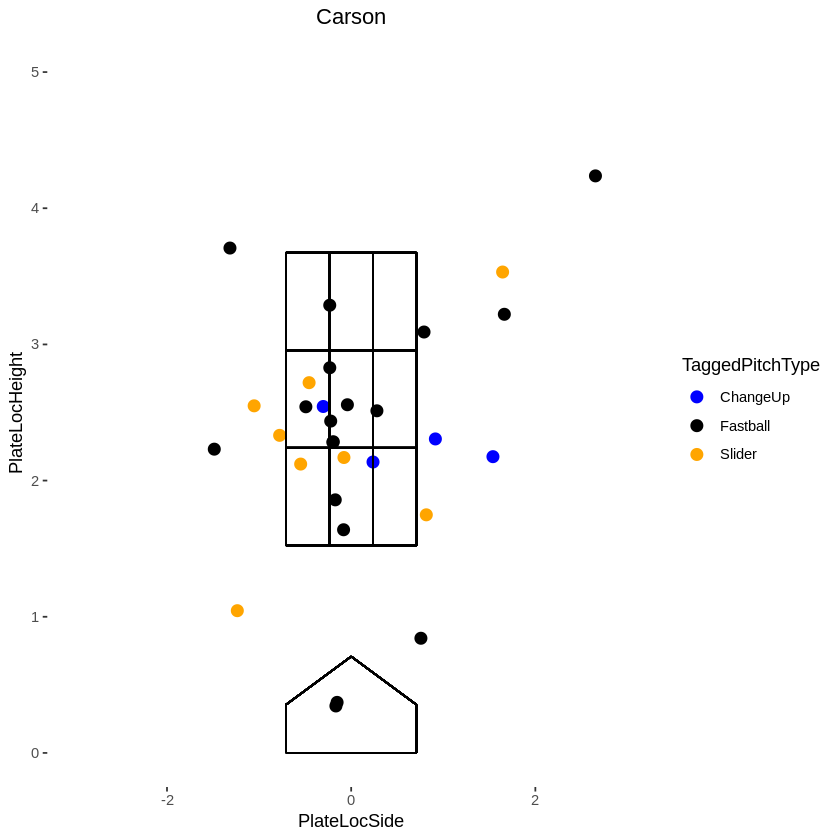

In [ ]:
Carson <- TestTrackMan %>% filter(Pitcher == 'Sentz, Carson') %>% ggplot(TestTrackMan,  mapping = aes(x = PlateLocSide, y = PlateLocHeight)) + geom_point(aes(color = TaggedPitchType), size = 3) +
  scale_color_manual(values = c(ChangeUp = 'blue', Fastball = 'black', Slider = 'Orange', Curveball = 'red',
  Cutter = 'green', Sinker = 'grey', Splitter = 'purple')) + geom_point(aes(color = TaggedPitchType), size = 0) +
  xlim(-3, 3) + ylim(0, 5) + #Pitches
  #The Box:
  geom_segment(x = Left, y = Bottom, xend = Right, yend = Bottom) +
  geom_segment(x = Left, y = Top, xend = Right, yend = Top) +
  geom_segment(x = Left, y = Bottom, xend = Left, yend = Top) +
  geom_segment(x = Right, y = Bottom, xend = Right, yend = Top) +
  #Inner horizontal lines:
  geom_segment(x = Left, y = Bottom + Height, xend = Right, yend = Bottom + Height) +
  geom_segment(x = Left, y = Top - Height, xend = Right, yend = Top - Height) +
  #Inner vertical lines:
  geom_segment(x = Left + Width, y = Bottom, xend = Left + Width, yend = Top) +
  geom_segment(x = Right - Width, y = Bottom, xend = Right - Width, yend = Top) +
  #Plate:
  geom_segment(x = Left, y = 0, xend = Right, yend = 0) +
  geom_segment(x = Left, y = 0, xend = Left, yend = 4.25/12) +
  geom_segment(x = Left, y = 4.25/12, xend = 0, yend = 8.5/12) +
  geom_segment(x = Right, y = 4.25/12, xend = Right, yend = 0) +
  geom_segment(x = 0, y = 8.5/12, xend = Right, yend = 4.25/12) + theme(plot.title = element_text(hjust = .5), panel.background = element_blank()) +
  ggtitle("Carson")
Carson

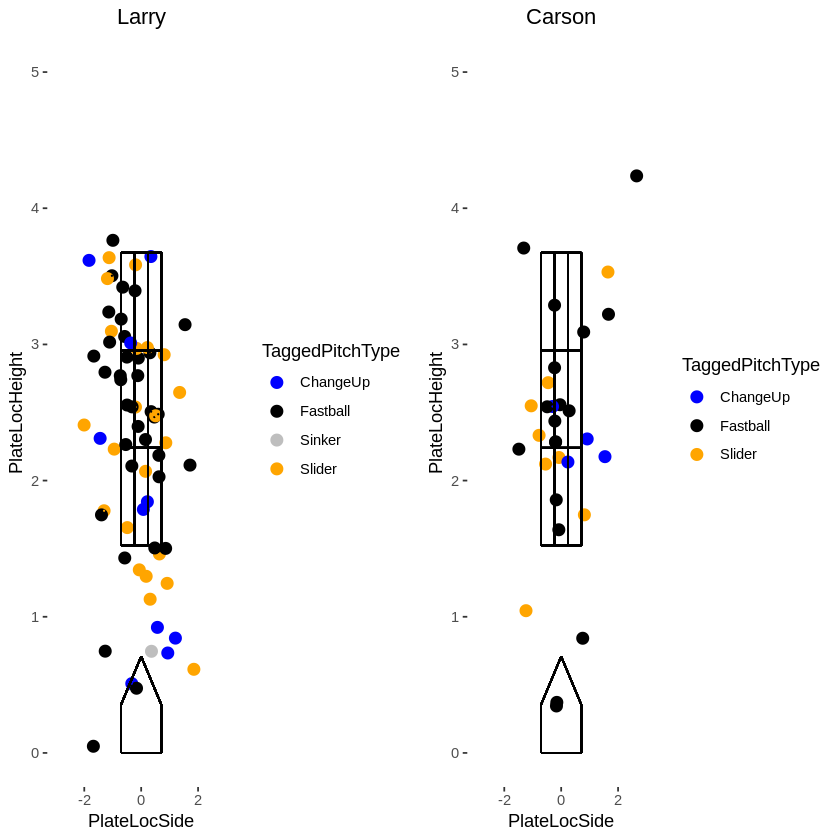

In [ ]:
ggarrange(Larry, Carson, nrow = 1, ncol = 2)

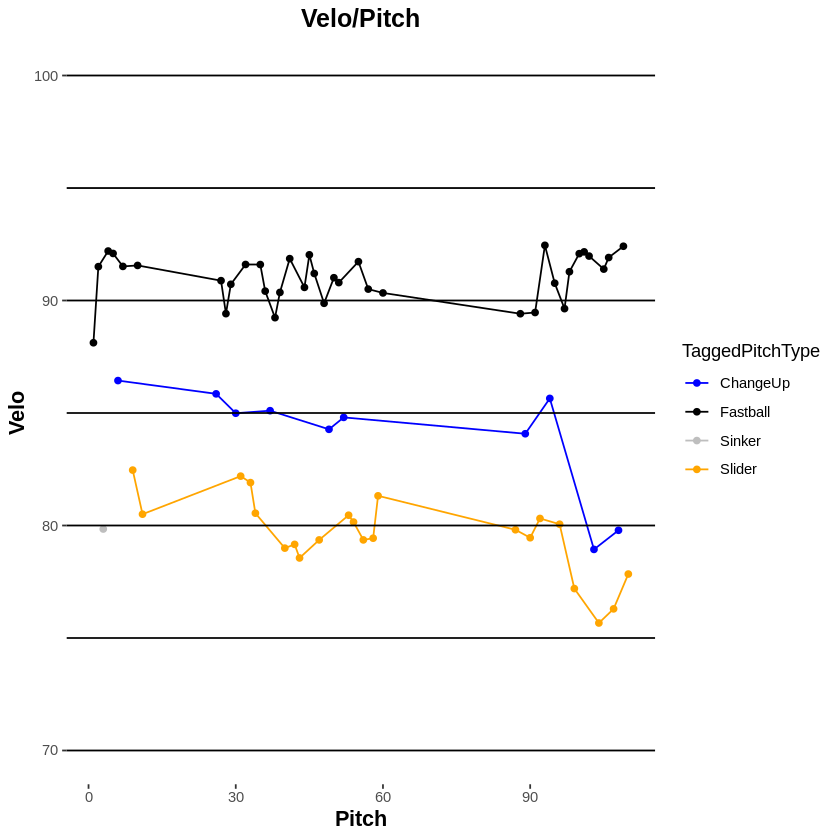

In [ ]:
Larry <- TestTrackMan %>% filter(Pitcher == 'Foster, Larry') %>% ggplot(TestTrackMan,  mapping = aes(x = PitchNo, y = RelSpeed, color= TaggedPitchType)) +
  geom_line() +  geom_point() + scale_color_manual(values = c(ChangeUp = 'blue', Fastball = 'black', Slider = 'Orange', Curveball = 'red',
  Cutter = 'green', Sinker = 'grey', Splitter = 'purple')) + xlab('Pitch') + ylab('Velo') +
    theme(plot.title = element_text(color = 'black', size = 15, face = 'bold', hjust = .5),
    axis.title.x = element_text(color = 'black', size = 13, face = 'bold'),
    axis.title.y = element_text(color = 'black', size = 13, face = 'bold'),
    panel.background = element_blank()) + geom_hline(yintercept = seq(from = 70, to = 100, by = 5)) +
  ggtitle("Velo/Pitch") #may need to do linewidth instead of size
Larry

In [ ]:
TM_Percentiles <- TestTrackMan[, .('Max Velo' = max(RelSpeed, na.rm = TRUE),
'Max Spin' = max(SpinRate, na.rm = TRUE)),
by = .(Pitcher, TaggedPitchType)]

TM_Percentiles$'Max Velo' <- round(TM_Percentiles$'Max Velo', digits = 1)
TM_Percentiles$'Max Spin' <- round(TM_Percentiles$'Max Spin', digits = 0)

TM_Percentiles$MaxVelo_percentile <- TM_Percentiles$'Max Velo'
TM_Percentiles$MaxVelo_percentile <- round(TM_Percentiles$MaxVelo_percentile, digits = 2)

TM_Percentiles$MaxVelo_percentile[TM_Percentiles$TaggedPitchType != 'Fastball'] <- NA

TM_Percentiles$MaxVelo_ranking[order(TM_Percentiles$MaxVelo_percentile, decreasing = TRUE)] <- 1:nrow(TM_Percentiles)

TM_Percentiles$MaxVelo_ranking[TM_Percentiles$TaggedPitchType != 'Fastball'] <- NA

TM_Percentiles$MaxVelo_percentile <- 1 - ((TM_Percentiles$MaxVelo_ranking)/max(TM_Percentiles$MaxVelo_ranking, na.rm = TRUE))

TM_Percentiles$MaxVelo_percentile <- round(TM_Percentiles$MaxVelo_percentile, digits = 2)

TM_Percentiles$MaxVelo_percentile <- TM_Percentiles$MaxVelo_percentile *100

In [ ]:
TM_Percentiles$MaxSpin_percentile <- TM_Percentiles$'Max Spin'
TM_Percentiles$MaxSpin_percentile <- round(TM_Percentiles$MaxSpin_percentile, digits = 2)

TM_Percentiles$MaxSpin_percentile[TM_Percentiles$TaggedPitchType != 'Fastball'] <- NA

TM_Percentiles$MaxSpin_ranking[order(TM_Percentiles$MaxSpin_percentile, decreasing = TRUE)] <- 1:nrow(TM_Percentiles)

TM_Percentiles$MaxSpin_ranking[TM_Percentiles$TaggedPitchType != 'Fastball'] <- NA

TM_Percentiles$MaxSpin_percentile <- 1 - ((TM_Percentiles$MaxSpin_ranking)/max(TM_Percentiles$MaxSpin_ranking, na.rm = TRUE))

TM_Percentiles$MaxSpin_percentile <- round(TM_Percentiles$MaxSpin_percentile, digits = 2)

TM_Percentiles$MaxSpin_percentile <- TM_Percentiles$MaxSpin_percentile *100

In [ ]:
TM_Percentiles <- TM_Percentiles[!is.na(TM_Percentiles$MaxVelo_percentile), ]
TM_Percentiles

Pitcher,TaggedPitchType,Max Velo,Max Spin,MaxVelo_percentile,MaxVelo_ranking,MaxSpin_percentile,MaxSpin_ranking
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
"Foster, Larry",Fastball,92.5,2267,53,8,29,12
"Grimes, Barry",Fastball,93.2,2163,65,6,12,15
"Sentz, Carson",Fastball,93.7,2367,71,5,76,4
"Kinder, Terry",Fastball,91.3,2484,35,11,88,2
"Nichols, Jimmy",Fastball,93.8,2011,76,4,6,16
"Watson, Alex",Fastball,91.4,2300,41,10,41,10
"Jones, Tory",Fastball,92.3,2573,47,9,94,1
"De Los Santos, Dave",Fastball,90.5,2367,18,14,71,5
"Manning, Corey",Fastball,94.7,2240,88,2,24,13


In [ ]:
All_Data_Low = subset(TM_Percentiles, select = c(1))
All_Data_Low <- All_Data_Low[!duplicated(All_Data_Low)]

All_Data_Low$TaggedPitchType <- 'Low'
All_Data_Low$'Max Velo' <- 0
All_Data_Low$'Max Spin' <- 0
All_Data_Low$MaxVelo_percentile <- -5
All_Data_Low$MaxVelo_ranking <- 20
All_Data_Low$MaxSpin_percentile <- -5
All_Data_Low$MaxSpin_ranking <- 20

All_Data_High = subset(TM_Percentiles, select = c(1))
All_Data_High <- All_Data_High[!duplicated(All_Data_High)]

All_Data_High$TaggedPitchType <- 'High'
All_Data_High$'Max Velo' <- 100
All_Data_High$'Max Spin' <- 100
All_Data_High$MaxVelo_percentile <- 105
All_Data_High$MaxVelo_ranking <- 1
All_Data_High$MaxSpin_percentile <- -105
All_Data_High$MaxSpin_ranking <- 1

LowHigh <- rbind(All_Data_Low, All_Data_High)

TM_Percentiles <- rbind(TM_Percentiles, LowHigh)
TM_Percentiles

Warning message in geom_text(aes(label = MaxVelo_percentile), hjust = 0.5, vjuts = 0.4, :
“Ignoring unknown parameters: `vjuts`”
Warning message in geom_text(aes(label = MaxSpin_percentile), hjust = 0.5, vjuts = 0.4, :
“Ignoring unknown parameters: `vjuts`”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside

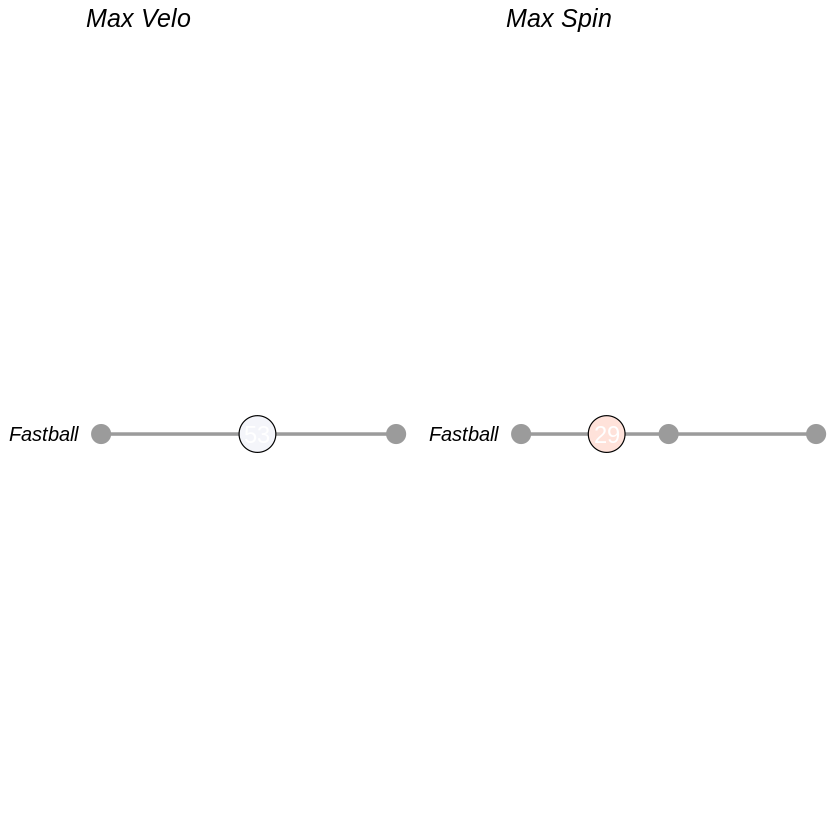

In [ ]:
MaxVelo <- TM_Percentiles %>% filter(Pitcher == "Foster, Larry",
  TaggedPitchType %in% c('Fastball', 'High', 'Low')) %>%
  ggplot(TM_Percentiles, mapping = aes(x = MaxVelo_percentile, y = TaggedPitchType,
  color = MaxVelo_percentile)) + geom_line() + geom_point(size = 9) + ggtitle('Max Velo') +
  xlim(0,100) + ylim('Fastball') + xlab('') + ylab('') + theme(plot.title = element_text(color = 'black',
  size = 15, face = 'italic'), axis.title.x = element_blank(), axis.title.y = element_blank(),
  axis.text.x = element_blank(), axis.ticks.y = element_blank(), axis.ticks.x = element_blank(),
  axis.text.y = element_text(size = 12, face = 'italic', color = 'black')) +
  geom_segment(aes(x = 0, xend = 100, y = TaggedPitchType, yend = TaggedPitchType), color = '#9b9b9b',
  linewidth = 1) + geom_point(aes(x= 0, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
  geom_point(aes(x= 50, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
  geom_point(aes(x= 100, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
  geom_point(aes(x= MaxVelo_percentile, y = TaggedPitchType, fill = MaxVelo_percentile),
  pch = 21, color = 'black', size = 10) + geom_text(aes(label = MaxVelo_percentile),
  hjust = .5, vjuts = .4, color = 'white', size = 5) + theme(legend.position = 'none') +
  scale_fill_gradient2(midpoint = 50, low = '#cc0000', mid = '#ffffff',
  high = '#2952a3', na.value = 'grey50') + theme(panel.background = element_blank())

MaxSpin <- TM_Percentiles %>% filter(Pitcher == "Foster, Larry",
  TaggedPitchType %in% c('Fastball', 'High', 'Low')) %>%
  ggplot(TM_Percentiles, mapping = aes(x = MaxSpin_percentile, y = TaggedPitchType,
  color = MaxSpin_percentile)) + geom_line() + geom_point(size = 9) + ggtitle('Max Spin') +
  xlim(0,100) + ylim('Fastball') + xlab('') + ylab('') + theme(plot.title = element_text(color = 'black',
  size = 15, face = 'italic'), axis.title.x = element_blank(), axis.title.y = element_blank(),
  axis.text.x = element_blank(), axis.ticks.y = element_blank(), axis.ticks.x = element_blank(),
  axis.text.y = element_text(size = 12, face = 'italic', color = 'black')) +
  geom_segment(aes(x = 0, xend = 100, y = TaggedPitchType, yend = TaggedPitchType), color = '#9b9b9b',
  linewidth = 1) + geom_point(aes(x= 0, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
  geom_point(aes(x= 50, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
  geom_point(aes(x= 100, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
  geom_point(aes(x= MaxSpin_percentile, y = TaggedPitchType, fill = MaxSpin_percentile),
  pch = 21, color = 'black', size = 10) +
  geom_text(aes(label = MaxSpin_percentile), hjust = .5, vjuts = .4, color = 'white',
  size = 5) + theme(legend.position = 'none') +
  scale_fill_gradient2(midpoint = 50, low = '#cc0000', mid = '#ffffff',
  high = '#2952a3', na.value = 'grey50') + theme(panel.background = element_blank())

ggarrange(MaxVelo, MaxSpin, nrow = 1, ncol = 2)

# **Aesthetically Pleasing Graphs**

In [ ]:
install.packages("paletteer")
install.packages("scales")

# Load the necessary libraries
library(paletteer)
library(scales)

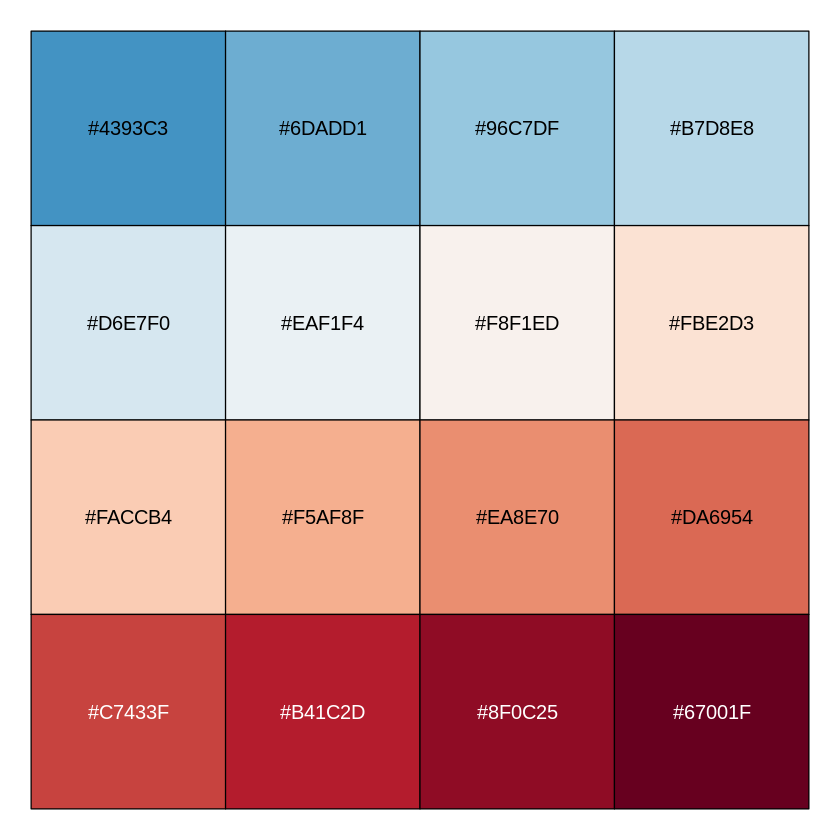

In [ ]:
heat_colors_interpolated <- colorRampPalette(paletteer::paletteer_d('RColorBrewer::RdBu', n = 9, direction = -1))(16)
heat_colors_interpolated %>% scales::show_col()

In [ ]:
#Filter by Pitcher:
pp1 <- TestTrackMan %>% filter(Pitcher == 'Foster, Larry')

freq <- pp1 %>% group_by(Pitcher, TaggedPitchType) %>% tally()
total <- as.numeric(sum(freq$n))
freq$'Usage %' <- round((freq$n/total) *100, digits = 0)
freq <- subset(freq, select = -c(n))

pp1 <- merge(pp1, freq)
pp1

Pitcher,TaggedPitchType,PitchNo,Date,Time,PAofInning,PitchofPA,PitcherId,PitcherThrows,PitcherTeam,⋯,Zone,run_val,HandDif,loc_count_run_val,loc_count_adj_run_val,SmartRunVal,Umpire,factor,tilt,Usage %
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
"Foster, Larry",ChangeUp,6,3/9/2021,04:41.2,2,2,1000078676,Left,Great North Coyotes,⋯,13,0.07,0,0.017612674,0.009083110,0.060916890,Test Umpire,17.38472,9.66,14
"Foster, Larry",ChangeUp,26,3/9/2021,18:45.9,1,1,1000078676,Left,Great North Coyotes,⋯,10,0.07,0,0.070000000,0.061470436,0.008529564,Test Umpire,17.84448,10.00,14
"Foster, Larry",ChangeUp,30,3/9/2021,20:30.4,1,5,1000078676,Left,Great North Coyotes,⋯,8,-0.26,0,-0.008247920,-0.016777484,-0.243222516,Test Umpire,17.27493,9.33,14
"Foster, Larry",ChangeUp,37,3/9/2021,23:36.2,3,2,1000078676,Left,Great North Coyotes,⋯,12,0.44,0,0.017717226,0.009187662,0.430812338,Test Umpire,17.15451,9.66,14
"Foster, Larry",ChangeUp,49,3/9/2021,29:40.3,6,3,1000078676,Left,Great North Coyotes,⋯,13,0.07,0,0.045559099,0.037029535,0.032970465,Test Umpire,16.19959,9.66,14
"Foster, Larry",ChangeUp,52,3/9/2021,32:11.6,8,1,1000078676,Left,Great North Coyotes,⋯,13,0.07,0,0.056720854,0.048191290,0.021808710,Test Umpire,16.98154,9.33,14
"Foster, Larry",ChangeUp,89,3/9/2021,59:24.1,1,3,1000078676,Left,Great North Coyotes,⋯,8,-0.06,0,-0.009580923,-0.018110487,-0.041889513,Test Umpire,15.49197,9.33,14
"Foster, Larry",ChangeUp,94,3/9/2021,01:26.5,2,1,1000078676,Left,Great North Coyotes,⋯,12,0.07,0,0.053688551,0.045158987,0.024841013,Test Umpire,16.70003,9.66,14
"Foster, Larry",ChangeUp,103,3/9/2021,08:53.8,4,2,8898850,Right,Great North Coyotes,⋯,3,0.07,0,0.020380292,0.011850728,0.058149272,Test Umpire,13.96566,1.33,14


In [ ]:
freq

Pitcher,TaggedPitchType,Usage %
<chr>,<chr>,<dbl>
"Foster, Larry",ChangeUp,14
"Foster, Larry",Fastball,52
"Foster, Larry",Sinker,1
"Foster, Larry",Slider,32


In [ ]:
pp1 <- pp1%>% filter(TaggedPitchType == 'Fastball')
Left <- -8.5/12
Right <- 8.5/12
Bottom <- 18.29/12
Top <- 44.08/12

Width = (Right - Left)/3
Height <- (Top - Bottom)/3

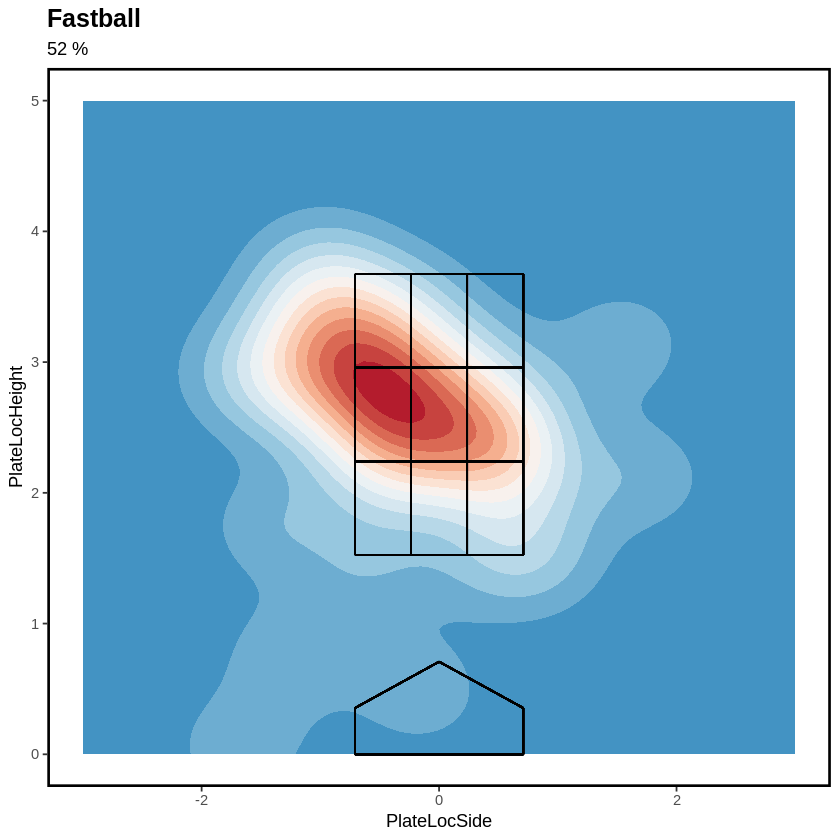

In [ ]:
ggplot(pp1, mapping = aes(x = PlateLocSide, y = PlateLocHeight)) + xlim(-3, 3) +
  ylim(0, 5) + stat_density2d_filled() + scale_fill_manual(values = c(heat_colors_interpolated),
  aes('fill', 'color')) + #Pitches
  #The Box:
  geom_segment(x = Left, y = Bottom, xend = Right, yend = Bottom) +
  geom_segment(x = Left, y = Top, xend = Right, yend = Top) +
  geom_segment(x = Left, y = Bottom, xend = Left, yend = Top) +
  geom_segment(x = Right, y = Bottom, xend = Right, yend = Top) +
  #Inner horizontal lines:
  geom_segment(x = Left, y = Bottom + Height, xend = Right, yend = Bottom + Height) +
  geom_segment(x = Left, y = Top - Height, xend = Right, yend = Top - Height) +
  #Inner vertical lines:
  geom_segment(x = Left + Width, y = Bottom, xend = Left + Width, yend = Top) +
  geom_segment(x = Right - Width, y = Bottom, xend = Right - Width, yend = Top) +
  #Plate:
  geom_segment(x = Left, y = 0, xend = Right, yend = 0) +
  geom_segment(x = Left, y = 0, xend = Left, yend = 4.25/12) +
  geom_segment(x = Left, y = 4.25/12, xend = 0, yend = 8.5/12) +
  geom_segment(x = Right, y = 4.25/12, xend = Right, yend = 0) +
  geom_segment(x = 0, y = 8.5/12, xend = Right, yend = 4.25/12) + theme(legend.position = 'none',
  plot.title = element_text(color = 'black', size = 15, face = 'bold'),
  panel.background = element_blank(), panel.border = element_rect(color = 'black',
  linewidth = 1.5, fill = NA)) + ggtitle(paste("Fastball"), paste(pp1$'Usage %', '%'))

# **Spray Chart**

In [ ]:
TestTrackMan$HitType <- TestTrackMan$Angle
TestTrackMan$HitType[TestTrackMan$HitType < 8] <- 'GB'
TestTrackMan$HitType[TestTrackMan$HitType >= 8 & TestTrackMan$HitType <= 15] <- 'LD'
TestTrackMan$HitType[TestTrackMan$HitType > 15] <- 'FB'

left <- TestTrackMan %>% filter(Batter == 'Neto, Clifford', PitcherThrows == 'Left')

left <- left[!is.na(left$HitType)]
left

l <- ggplot(left, aes(x = sin(pi/180*Bearing)*Distance, y = cos(pi/180*Bearing)*Distance)) +
  geom_point(aes(color = ExitSpeed), size = 3) + scale_color_gradient2(low = 'blue',
  high = 'red', midpoint = mean(90)) + xlim(-295, 295) + ylim(0, 450) +
  geom_segment(x = 0, xend = -315, y = 0, yend = 315, size = 1.2) +
  geom_segment(x = 0, xend = 315, y = 0, yend = 315, size = 1.2) +
  geom_curve(x = -315, xend = 315, y = 315, yend = 315, curvature = -.35, size = 1.2) +
  geom_curve(x = -90, xend = 90, y = 88, yend = 88, curvature = -.45, size = 1.2) +
  coord_fixed() + theme_bw() + theme(plot.title = element_text(hjust = .5,
  face = 'bold', size = 16)) + labs(color = '', title = 'Spray Chart') +
  theme(axis.title.x = element_blank(), axis.title.y = element_blank(),
  panel.background = element_blank(), panel.grid.minor = element_blank(),
  panel.grid.major = element_blank())

right <- TestTrackMan %>% filter(Batter == 'Neto, Clifford', PitcherThrows == 'Right')

right <- right[!is.na(right$HitType)]
right

r <- ggplot(right, aes(x = sin(pi/180*Bearing)*Distance, y = cos(pi/180*Bearing)*Distance)) +
  geom_point(aes(color = ExitSpeed), size = 3) + scale_color_gradient2(low = 'blue',
  high = 'red', midpoint = mean(90)) + xlim(-295, 295) + ylim(0, 450) +
  geom_segment(x = 0, xend = -315, y = 0, yend = 315, size = 1.2) +
  geom_segment(x = 0, xend = 315, y = 0, yend = 315, size = 1.2) +
  geom_curve(x = -315, xend = 315, y = 315, yend = 315, curvature = -.35, size = 1.2) +
  geom_curve(x = -90, xend = 90, y = 88, yend = 88, curvature = -.45, size = 1.2) +
  coord_fixed() + theme_bw() + theme(plot.title = element_text(hjust = .5,
  face = 'bold', size = 16)) + labs(color = '', title = 'Spray Chart') +
  theme(axis.title.x = element_blank(), axis.title.y = element_blank(),
  panel.background = element_blank(), panel.grid.minor = element_blank(),
  panel.grid.major = element_blank())

PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,⋯,CatcherThrowLocationConfidence,Zone,run_val,HandDif,loc_count_run_val,loc_count_adj_run_val,SmartRunVal,Umpire,factor,tilt
<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
4,3/9/2021,03:48.2,1,4,"Foster, Larry",1000078676,Left,Great North Coyotes,"Neto, Clifford",⋯,NA,4,-0.26,0,-0.01176220,-0.02029176,-0.2397082,Test Umpire,19.80088,10.33
51,3/9/2021,31:29.9,7,1,"Foster, Larry",1000078676,Left,Great North Coyotes,"Neto, Clifford",⋯,NA,7,0.44,0,-0.02646631,-0.03499587,0.4749959,Test Umpire,20.26236,10.66


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,⋯,CatcherThrowLocationConfidence,Zone,run_val,HandDif,loc_count_run_val,loc_count_adj_run_val,SmartRunVal,Umpire,factor,tilt
<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
142,3/9/2021,33:53.7,1,5,"Nichols, Jimmy",8898850,Right,Great North Coyotes,"Neto, Clifford",⋯,NA,6,-0.26,1,-0.01678795,-0.02531751,-0.2346825,Test Umpire,18.82611,1.00
218,3/9/2021,23:09.7,3,4,"Manning, Corey",8898850,Right,Great North Coyotes,"Neto, Clifford",⋯,NA,4,1.39,1,-0.03721195,-0.04574152,1.4357415,Test Umpire,17.46039,12.66
271,3/9/2021,59:53.6,3,3,"Manning, Corey",1000069446,Right,Great North Coyotes,"Neto, Clifford",⋯,NA,1,-0.26,1,-0.02467319,-0.03320275,-0.2267973,Test Umpire,20.51258,1.00
344,3/9/2021,48:28.8,2,4,"Murphy, Mark",1000069408,Right,Great North Coyotes,"Neto, Clifford",⋯,NA,13,-0.26,1,-0.02225300,-0.03078256,-0.2292174,Test Umpire,15.47169,7.00


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


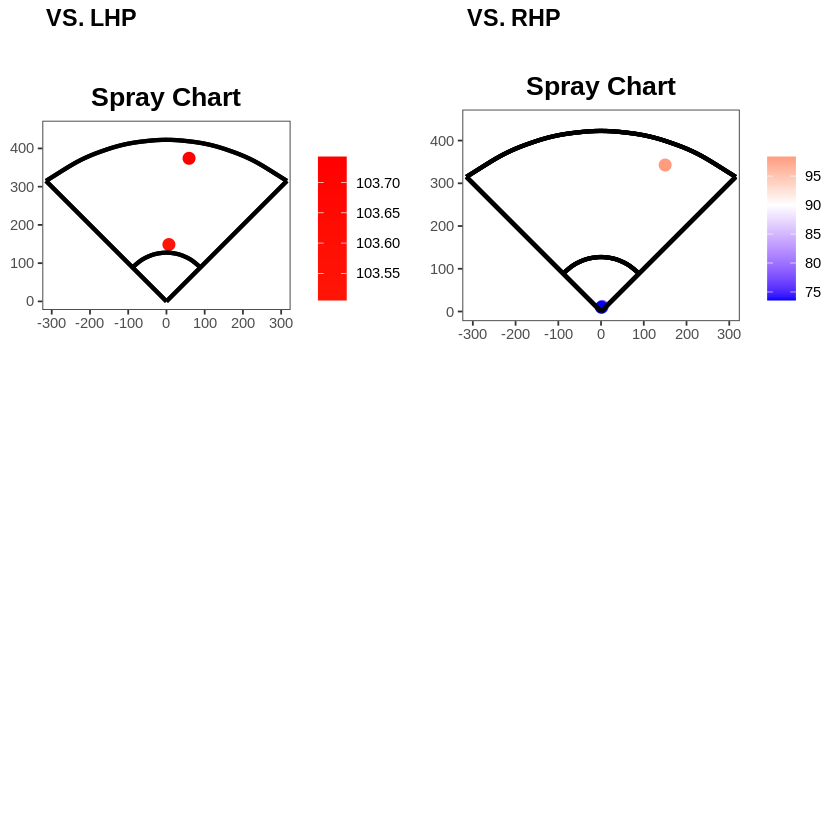

In [ ]:
d <- ggarrange(l, r, labels = c('VS. LHP', 'VS. RHP'), ncol = 2, nrow = 2)
d

# **Shiny App**

In [ ]:
install.packages("shiny")
install.packages('lubridate')
library(shiny)
library(lubridate)

TestTrackMan = fread('TestTrackMan.csv')
TM_Percentiles = fread('TM_Percentiles.csv')

In [ ]:
ui <- navbarPage('Title of App', theme = 'flatly',
  tabPanel('Pitchers', sidebarLayout(sidebarPanel(selectInput('Pitcher', label = 'Choose Pitcher',
  choices = levels(as.factor(TestTrackMan$Pitcher))), width = 2), mainPanel(plotOutput('SampleOutput'),
  width = 12, height = 12))))

In [ ]:
server = function(input, output, session){

}

In [ ]:
shinyApp(ui = ui, server = server)

**UI Inputs**

In [ ]:
TestTrackMan$Date <- mdy(TestTrackMan$Date)

In [ ]:
ui <- navbarPage('Title of App', theme = 'flatly',
                 tabPanel('Pitchers',
                          sidebarLayout(
                            sidebarPanel(
                              selectInput('Team', label = 'Choose Team',
                                          choices = levels(as.factor(TestTrackMan$PitcherTeam))),
                              selectInput('Pitcher', label = 'Choose Pitcher',
                                          choices = levels(as.factor(TestTrackMan$Pitcher))),
                              dateRangeInput('Date', label = 'Choose Date Range',
                                             start = min(TestTrackMan$Date),
                                             end = max(TestTrackMan$Date),
                                             min = min(TestTrackMan$Date),
                                             max = max(TestTrackMan$Date),
                                             format = 'yyyy-mm-dd',
                                             separator = 'to'),
                              checkboxGroupInput('Pitch', label = 'Choose Pitch Type(s)',
                                                 choices = levels(as.factor(TestTrackMan$TaggedPitchType))),
                              width = 2),
                            mainPanel()),),)

In [ ]:
server = function(input, output, session){
  observeEvent(input$Team, updateSelectInput(session, 'Pitcher', 'Choose Pitcher',
                                             choices = levels(factor(
                                               filter(TestTrackMan,
                                                PitcherTeam == isolate(input$Team))$Pitcher))))

  observeEvent(input$Pitcher, updateDateRangeInput(session, 'Date', 'Choose Date Range',
                                                start = min(TestTrackMan$Date),
                                                end = max(TestTrackMan$Date)))

  observeEvent(input$Pitcher, updateCheckboxGroupInput(session, 'Pitch', 'Choose Pitch Type(s)',
                                                       choices = levels(factor(filter(TestTrackMan,
                                                       Pitcher == isolate(input$Pitcher))$TaggedPitchType))))
}
shinyApp(ui = ui, server = server)

**Multiple Tabs**

In [ ]:
install.packages("shinythemes")
install.packages('shinydashboard')
library(shinythemes)
library(shinydashboard)

In [ ]:
ui <- navbarPage('Athlete Lab', theme = shinytheme('flatly'),
                 tabPanel('Players',
                          tabsetPanel(
                            tabPanel('Pitchers',
                                     tabsetPanel(
                                       tabPanel('Plotly 2D',
                                                sidebarLayout(
                                                  sidebarPanel(
                                                    selectInput('PitcherTeam', label = 'Choose Team',
                                                                choices = levels(as.factor(TestTrackMan$PitcherTeam))),
                                                    selectInput('Pitcher', label = 'Choose Pitcher',
                                                                choices = levels(as.factor(TestTrackMan$Pitcher))),
                                                    dateRangeInput('Date', label = 'Choose Date Range',
                                                                   start = min(TestTrackMan$Date),
                                                                   end = max(TestTrackMan$Date),
                                                                   min = min(TestTrackMan$Date),
                                                                   max = max(TestTrackMan$Date),
                                                                   format = 'yyyy-mm-dd', separator = 'to'),
                                                    checkboxGroupInput('Pitch', label = 'Choose Pitch Type(s)',
                                                                       choices = levels(as.factor(TestTrackMan$TaggedPitchType))),
                                                    radioButtons('BatterSide', label = 'Batter Side',
                                                                 choices = levels(as.factor(TestTrackMan$BatterSide))),
                                                    width = 2
                                                  ),
                                                  mainPanel(
                                                    br(),
                                                    fluidRow(box(plotlyOutput('StrikeZone'), width = 12)),
                                                    br(), br()
                                                  ))))),

                            tabPanel('Test',
                                     tabsetPanel(
                                       tabPanel('Plotly 3D',
                                                sidebarLayout(
                                                  sidebarPanel(
                                                    selectInput('PitcherTeam2', label = 'Choose Team',
                                                                choices = levels(as.factor(TestTrackMan$PitcherTeam))),
                                                    selectInput('Pitcher2', label = 'Choose Pitcher',
                                                                choices = levels(as.factor(TestTrackMan$Pitcher))),
                                                    width = 3
                                                  ),
                                                  mainPanel(
                                                    br(),
                                                    fluidRow(box(plotlyOutput('ThreeD'), width = 12)),
                                                    br(), br()
                                                  )))))))
)

server = function(input, output, session) {

}

shinyApp(ui = ui, server = server)


In [ ]:
server = function(input, output, session){

}
shinyApp(ui = ui, server = server)

**Outputs**

In [ ]:
ui <- navbarPage('Athlete Lab', theme = 'flatly',
                 tabPanel('Pitchers',
                          sidebarLayout(
                            sidebarPanel(
                              selectInput('Team',
                                          label = 'Choose Team',
                                          choices = levels(as.factor(TestTrackMan$PitcherTeam))),
                                                  selectInput('Pitcher',
                                                              label = 'Choose Pitcher',
                                                              choices = levels(
                                                                as.factor(TestTrackMan$Pitcher))),
                                                  dateRangeInput('Date',
                                                                 label = 'Choose Date Range',
                                                                 start = min(TestTrackMan$Date),
                                                                 end = max(TestTrackMan$Date),
                                                                 min = min(TestTrackMan$Date),
                                                                 max = max(TestTrackMan$Date),
                                                                 format = 'yyyy-mm-dd',
                                                                 separator = 'to'),
                                                  checkboxGroupInput('Pitch',
                                                                     label = 'Choose Pitch Type(s)',
                                                                     choices = levels(as.factor(TestTrackMan$TaggedPitchType))),
                                                  width = 2),
                            mainPanel(
                              fluidRow(plotOutput('Percentiles')),
                              br(),
                              br(),
                              br(),
                              br(),
                              br(),
                              fluidRow(DTOutput('Percentiles_Data')),
                              br(),
                              br(),
                              br(),
                              br(),
                              br(),
                              fluidRow(plotOutput('Velo_Chart')),
                              br(),
                              br(),
                              br(),
                              br(),
                              br(),
                              fluidRow(plotOutput('Strike_Zone')),)),),)

In [ ]:
server = function(input, output, session){
  observeEvent(input$Team,
               updateSelectInput(session, 'Pitcher', 'Choose Pitcher', choices =
                                   levels(
                                     factor(
                                       filter(TestTrackMan,
                                              PitcherTeam == isolate(input$Team))$Pitcher))))

  observeEvent(input$Pitcher,
               updateDateRangeInput(session, 'Date', 'Choose Date Range',
                                                   start = min(TestTrackMan$Date),
                                                   end = max(TestTrackMan$Date)))

  observeEvent(input$Pitcher, updateCheckboxGroupInput(session, 'Pitch', 'Choose Pitch Type(s)',
                                                       choices = levels(
                                                         factor(
                                                           filter(TestTrackMan, Pitcher == isolate(input$Pitcher))$TaggedPitchType))))

  #Plots and Data Tables:
  #Percentiles:
  output$Percentiles <- renderPlot({
    #FB Max Velo:
    MaxVelo <- TM_Percentiles %>% filter(PitcherTeam == input$Team,
                                         Pitcher == input$Pitcher,
                                         TaggedPitchType %in% c('Fastball', 'High', 'Low')) %>%
      ggplot(TM_Percentiles, mapping = aes(x = MaxVelo_percentile, y = TaggedPitchType,
                                           color = MaxVelo_percentile)) + geom_line() + geom_point(size = 9) + ggtitle('Max Velo') +
      xlim(0,100) + ylim('Fastball') + xlab('') + ylab('') + theme(plot.title = element_text(color = 'black',
                                                                                             size = 15, face = 'italic'), axis.title.x = element_blank(), axis.title.y = element_blank(),
                                                                   axis.text.x = element_blank(), axis.ticks.y = element_blank(), axis.ticks.x = element_blank(),
                                                                   axis.text.y = element_text(size = 12, face = 'italic', color = 'black')) +
      geom_segment(aes(x = 0, xend = 100, y = TaggedPitchType, yend = TaggedPitchType), color = '#9b9b9b',
                   linewidth = 1) + geom_point(aes(x= 0, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
      geom_point(aes(x= 50, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
      geom_point(aes(x= 100, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
      geom_point(aes(x= MaxVelo_percentile, y = TaggedPitchType, fill = MaxVelo_percentile),
                 pch = 21, color = 'black', size = 10) + geom_text(aes(label = MaxVelo_percentile),
                                                                   hjust = .5, vjust = .4, color = 'white', size = 5) + theme(legend.position = 'none') +
      scale_fill_gradient2(midpoint = 50, low = '#cc0000', mid = '#ffffff',
                           high = '#2952a3', na.value = 'grey50') + theme(panel.background = element_blank())

  #FB Max Spin:
  MaxSpin <- TM_Percentiles %>% filter(PitcherTeam == input$Team,
                                       Pitcher == input$Pitcher,
                                       TaggedPitchType %in% c('Fastball', 'High', 'Low')) %>%
    ggplot(TM_Percentiles, mapping = aes(x = MaxSpin_percentile, y = TaggedPitchType,
                                         color = MaxSpin_percentile)) + geom_line() + geom_point(size = 9) + ggtitle('Max Spin') +
    xlim(0,100) + ylim('Fastball') + xlab('') + ylab('') + theme(plot.title = element_text(color = 'black',
                                                                                           size = 15, face = 'italic'), axis.title.x = element_blank(), axis.title.y = element_blank(),
                                                                 axis.text.x = element_blank(), axis.ticks.y = element_blank(), axis.ticks.x = element_blank(),
                                                                 axis.text.y = element_text(size = 12, face = 'italic', color = 'black')) +
    geom_segment(aes(x = 0, xend = 100, y = TaggedPitchType, yend = TaggedPitchType), color = '#9b9b9b',
                 linewidth = 1) + geom_point(aes(x= 0, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
    geom_point(aes(x= 50, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
    geom_point(aes(x= 100, y = TaggedPitchType), color = '#9b9b9b', size = 5) +
    geom_point(aes(x= MaxSpin_percentile, y = TaggedPitchType, fill = MaxSpin_percentile),
               pch = 21, color = 'black', size = 10) +
    geom_text(aes(label = MaxSpin_percentile), hjust = .5, vjust = .4, color = 'white',
              size = 5) + theme(legend.position = 'none') +
    scale_fill_gradient2(midpoint = 50, low = '#cc0000', mid = '#ffffff',
                         high = '#2952a3', na.value = 'grey50') + theme(panel.background = element_blank())
  ggarrange(MaxVelo, MaxSpin, nrow = 1, ncol = 2)
})

  #Percentiles_Data:
  output$Percentiles_Data <- renderDT({
    TMP <- TM_Percentiles %>% filter(TaggedPitchType == 'Fastball',
                                         PitcherTeam == input$Team,
                                         Pitcher == input$Pitcher)

    TMP <- subset(TMP, select = -c(6,8))

    datatable(TMP, caption = htmltools::tags$caption(style = 'caption-side: top;
                                                    text-align: center; color:black;
                                                    font-size:200% ;',
                                                    'Fastball Percentiles'),
              options = list(dom = 't', columnDefs = list(list(targets = 0, visible = FALSE)))) %>%
      formatStyle(c(1), `border-left` = 'solid 1px') %>% formatStyle(c(7), `border-right` = 'solid-1px')
  })

  #Velo_Chart:
  output$Velo_Chart <- renderPlot({
    TestTrackMan %>% filter(PitcherTeam == input$Team,
                                         Pitcher == input$Pitcher,
                                         TaggedPitchType %in% input$Pitch) %>%
      ggplot(TestTrackMan, mapping = aes(x = PitchNo, y = RelSpeed,
                                           color = TaggedPitchType)) + geom_line() + geom_point() +
      ggtitle('Velo/Pitch') + scale_color_manual(values = c(ChangeUp = 'blue', Fastball = 'black',
                                                            Slider = 'orange', Curveball = 'red',
                                                            Cutter = 'green', Sinker = 'grey',
                                                            Splitter = 'purple')) + xlab('Pitch') +
                                                   ylab('Velocity') +
                                                   theme(plot.title = element_text(color = 'black',
                                                                                   size = 15,
                                                                                   face = 'bold', hjust = .5),
                                                         axis.title.x = element_text(color = 'black',
                                                                                      size = 13,
                                                                                      face = 'bold'),
                                                         axis.title.y = element_text(color = 'black',
                                                                                     size = 13,
                                                                                     face = 'bold'),
                                                         panel.grid.major = element_blank(),
                                                         panel.grid.minor = element_blank(),
                                                         panel.background = element_blank()) +
                                                   geom_hline(yintercept = seq(from = 70, to = 100, by = 5))
    })

    #Strike Zone:
    output$Strike_Zone <- renderPlot({
      Left <- -8.5/12
      Right <- 8.5/12
      Bottom <- 18.29/12
      Top <- 44.08/12

      Width = (Right - Left)/3
      Height <- (Top - Bottom)/3

      TestTrackMan %>% filter(PitcherTeam == input$Team,
                              Pitcher == input$Pitcher,
                              TaggedPitchType %in% input$Pitch) %>%
        ggplot(TestTrackMan, mapping = aes(x = PlateLocSide, y = PlateLocHeight)) + geom_point(aes(color = TaggedPitchType), size = 3) +
        scale_color_manual(values = c(ChangeUp = 'blue', Fastball = 'black', Slider = 'Orange', Curveball = 'red',
                                      Cutter = 'green', Sinker = 'grey', Splitter = 'purple')) + geom_point(aes(color = TaggedPitchType), size = 0) +
        xlim(-3, 3) + ylim(0, 5) + #Pitches
        #The Box:
        geom_segment(x = Left, y = Bottom, xend = Right, yend = Bottom) +
        geom_segment(x = Left, y = Top, xend = Right, yend = Top) +
        geom_segment(x = Left, y = Bottom, xend = Left, yend = Top) +
        geom_segment(x = Right, y = Bottom, xend = Right, yend = Top) +
        #Inner horizontal lines:
        geom_segment(x = Left, y = Bottom + Height, xend = Right, yend = Bottom + Height) +
        geom_segment(x = Left, y = Top - Height, xend = Right, yend = Top - Height) +
        #Inner vertical lines:
        geom_segment(x = Left + Width, y = Bottom, xend = Left + Width, yend = Top) +
        geom_segment(x = Right - Width, y = Bottom, xend = Right - Width, yend = Top) +
        #Plate:
        geom_segment(x = Left, y = 0, xend = Right, yend = 0) +
        geom_segment(x = Left, y = 0, xend = Left, yend = 4.25/12) +
        geom_segment(x = Left, y = 4.25/12, xend = 0, yend = Right) +
        geom_segment(x = Right, y = 4.25/12, xend = Right, yend = 0) +
        geom_segment(x = 0, y = Right, xend = Right, yend = 4.25/12) + theme(plot.title = element_text(hjust = .5), panel.background = element_blank()) +
        ggtitle("Strike Zone")
    })
  }
shinyApp(ui = ui, server = server)

**Reactive and Linking Inputs**

In [ ]:
ui <- navbarPage(
  'Athlete Lab',
  theme = shinytheme('flatly'),
  tabPanel(
    'Players',
    tabsetPanel(
      tabPanel(
        'Pitchers',
        tabsetPanel(
          tabPanel(
            'Plotly 2D',
            sidebarLayout(
              sidebarPanel(
                selectInput('PitcherTeam', label = 'Choose Team',
                            choices = levels(as.factor(TestTrackMan$PitcherTeam))),
                selectInput('Pitcher', label = 'Choose Pitcher',
                            choices = levels(as.factor(TestTrackMan$Pitcher))),
                dateRangeInput('Date', label = 'Choose Date Range',
                               start = min(TestTrackMan$Date),
                               end = max(TestTrackMan$Date),
                               min = min(TestTrackMan$Date),
                               max = max(TestTrackMan$Date),
                               format = 'yyyy-mm-dd', separator = 'to'),
                checkboxGroupInput('PitchType', label = 'Choose Pitch Type(s)',
                                   choices = levels(as.factor(TestTrackMan$TaggedPitchType))),
                radioButtons('BatterSide', label = 'Batter Side',
                             choices = levels(as.factor(TestTrackMan$BatterSide))),
                width = 2
              ),
              mainPanel(
                br(),
                fluidRow(box(plotlyOutput('StrikeZone'), width = 12)),
                br(), br()
              ))),
          tabPanel(
            'Plotly 3D',
            sidebarLayout(
              sidebarPanel(
                selectInput('PitcherTeam2', label = 'Choose Team',
                            choices = levels(as.factor(TestTrackMan$PitcherTeam))),
                selectInput('Pitcher2', label = 'Choose Pitcher',
                            choices = levels(as.factor(TestTrackMan$Pitcher))),
                width = 3
              ),
              mainPanel(
                br(),
                fluidRow(box(plotlyOutput('ThreeD'), width = 12)),
                br(), br()
              ))))))))

In [ ]:
server = function(input, output, session){
  # Reactive UI updates:
  observeEvent(input$PitcherTeam, {
    updateSelectInput(session, 'Pitcher', 'Choose Pitcher',
                      choices = levels(factor(TestTrackMan$Pitcher[TestTrackMan$PitcherTeam == input$PitcherTeam])))
  })

  observeEvent(input$Pitcher, {
    filtered <- TestTrackMan[TestTrackMan$Pitcher == input$Pitcher, ]

    updateCheckboxGroupInput(session, 'PitchType', 'Choose Pitch Type(s)',
                             choices = levels(factor(filtered$TaggedPitchType)))

    updateDateRangeInput(session, 'Date', 'Choose Date Range',
                         start = min(filtered$Date), end = max(filtered$Date),
                         min = min(filtered$Date), max = max(filtered$Date))

    updateRadioButtons(session, 'BatterSide', 'Batter Side',
                       choices = levels(factor(filtered$BatterSide)))
  })

  # Strike Zone Plot:
  output$StrikeZone <- renderPlotly({
    req(input$Pitcher, input$PitchType, input$Date, input$BatterSide)

    # Filter data based on input
    filtered <- TestTrackMan %>%
      filter(Pitcher == input$Pitcher,
             PitcherTeam == input$PitcherTeam,
             TaggedPitchType %in% input$PitchType,
             Date >= input$Date[1] & Date <= input$Date[2],
             BatterSide == input$BatterSide)

    # Round numeric values for display
    filtered <- filtered %>%
      mutate(
        RelSpeed = round(RelSpeed, 1),
        InducedVertBreak = round(InducedVertBreak, 1),
        HorzBreak = round(HorzBreak, 1),
        PlateLocSide = round(PlateLocSide, 2),
        PlateLocHeight = round(PlateLocHeight, 2)
      )

    # Strike zone dimensions
    Left <- -8.5/12
    Right <- 8.5/12
    Bottom <- 18.29/12
    Top <- 44.08/12
    Width <- (Right - Left)/3
    Height <- (Top - Bottom)/3

    p <- ggplot(filtered, aes(x = PlateLocSide, y = PlateLocHeight, color = TaggedPitchType, text = paste(
      "Pitch Type:", TaggedPitchType,
      "<br>Rel Speed:", RelSpeed,
      "<br>Induced VB:", InducedVertBreak,
      "<br>Horz Break:", HorzBreak,
      "<br>Date:", Date,
      "<br>Batter Team:", BatterTeam
    ))) +
      geom_point(size = 3) +
      scale_color_manual(values = c(
        ChangeUp = 'blue', Fastball = 'black', Slider = 'orange', Curveball = 'red',
        Cutter = 'green', Sinker = 'grey', Splitter = 'purple')) +
      xlim(-3, 3) + ylim(0, 5) +
      # Strike zone box
      geom_segment(aes(x = Left, y = Bottom, xend = Right, yend = Bottom)) +
      geom_segment(aes(x = Left, y = Top, xend = Right, yend = Top)) +
      geom_segment(aes(x = Left, y = Bottom, xend = Left, yend = Top)) +
      geom_segment(aes(x = Right, y = Bottom, xend = Right, yend = Top)) +
      # Inner horizontal lines
      geom_segment(aes(x = Left, y = Bottom + Height, xend = Right, yend = Bottom + Height)) +
      geom_segment(aes(x = Left, y = Top - Height, xend = Right, yend = Top - Height)) +
      # Inner vertical lines
      geom_segment(aes(x = Left + Width, y = Bottom, xend = Left + Width, yend = Top)) +
      geom_segment(aes(x = Right - Width, y = Bottom, xend = Right - Width, yend = Top)) +
      theme_minimal() +
      ggtitle("Strike Zone") +
      theme(plot.title = element_text(hjust = 0.5))

    ggplotly(p, tooltip = 'text')
  })
}
shinyApp(ui = ui, server = server)

# **Project**

In [ ]:
get_Percentiles <- function(df){
  df$'barrels_per_swing' <- round(df$'barrels_per_swing', digits = 1)
  df$'whiff%' <- round(df$'whiff%', digits = 1)

  df$`whiff%_percentile` <- df$'whiff%'
  df$`whiff%_percentile` <- round(df$`whiff%_percentile`, digits = 1)

  df$barrels_per_swing_percentile <- df$'barrels_per_swing'
  df$barrels_per_swing_percentile <- round(df$barrels_per_swing_percentile, digits = 1)

  df$`Whiff%_ranking`[order(df$`whiff%`, decreasing = TRUE)] <- 1:nrow(df)
  df$barrels_per_swing_ranking[order(df$barrels_per_swing, decreasing = TRUE)] <- 1:nrow(df)

  df$`whiff%_percentile` <- ((df$`Whiff%_ranking`)/max(df$`Whiff%_ranking`, na.rm = TRUE))
  df$barrels_per_swing_percentile <- 1 - ((df$barrels_per_swing_ranking)/max(df$barrels_per_swing_ranking, na.rm = TRUE))

  df$`whiff%_percentile` <- round(df$`whiff%_percentile`, digits = 1)
  df$barrels_per_swing_percentile <- round(df$barrels_per_swing_percentile, digits = 1)

  df$`whiff%_percentile` <- df$`whiff%_percentile` * 100
  df$barrels_per_swing_percentile <- df$barrels_per_swing_percentile * 100
  return(df)
}

In [ ]:
get_Low_High <- function(df){
  All_Data_Low = subset(df, select = c(1))
  All_Data_Low <- All_Data_Low[!duplicated(All_Data_Low)]

  All_Data_Low$Tagged_Swing <- 'Low'
  All_Data_Low$'barrels_per_swing' <- 0
  All_Data_Low$'whiff%' <- 0
  All_Data_Low$`whiff%_percentile` <- -5
  All_Data_Low$`Whiff%_ranking` <- 20
  All_Data_Low$barrels_per_swing_percentile <- -5
  All_Data_Low$barrels_per_swing_ranking <- 20

  All_Data_High = subset(df, select = c(1))
  All_Data_High <- All_Data_High[!duplicated(All_Data_High)]

  All_Data_High$Tagged_Swing <- 'High'
  All_Data_High$'barrels_per_swing' <- 100
  All_Data_High$'whiff%' <- 100
  All_Data_High$`whiff%_percentile` <- 105
  All_Data_High$`Whiff%_ranking` <- 1
  All_Data_High$barrels_per_swing_percentile <- 105
  All_Data_High$barrels_per_swing_ranking <- 1

  LowHigh <- rbind(All_Data_Low, All_Data_High)
  df <- rbind(df, LowHigh)
  return(df)
}

In [ ]:
Hitting = fread('Athlete_Project.csv')
head(Hitting)

In [ ]:
Hitting$Name = 'Joey Smith'
Hitting_low_speed = Hitting %>% filter(`Bat Speed` == '<= 73 MPH')
Hitting_high_speed = Hitting %>% filter(`Bat Speed` == '>= 77 MPH')

In [ ]:
Hitting_low_speed_avg <- Hitting_low_speed[, .(
  `barrels_per_swing` = mean(Barrel, na.rm = TRUE) * 100,
  `whiff%` = mean(Whiff, na.rm = TRUE) * 100),
  by = .(Name)]

bat_speed_73_under_MLB = fread('73_under.csv')
bat_speed_73_under = rbind(Hitting_low_speed_avg, bat_speed_73_under_MLB)
#bat_speed_73_under$`Bat Speed`= '<=73'
head(bat_speed_73_under)

In [ ]:
Hitting_high_speed_avg <- Hitting_high_speed[, .(
  `barrels_per_swing` = mean(Barrel, na.rm = TRUE) * 100,
  `whiff%` = mean(Whiff, na.rm = TRUE) * 100),
  by = .(Name)]

bat_speed_77_up_MLB = fread('77_up.csv')
bat_speed_77_up_MLB = bat_speed_77_up_MLB[, -c(4:7)]
bat_speed_77_up = rbind(Hitting_high_speed_avg, bat_speed_77_up_MLB)
head(bat_speed_77_up)

In [ ]:
bat_speed_77_up_percentiles = get_Percentiles(bat_speed_77_up)
bat_speed_77_up_percentiles$'Tagged_Swing' = 'Competitive Swing'
bat_speed_77_up_lh = get_Low_High(bat_speed_77_up_percentiles)
bat_speed_77_up_lh$`Bat Speed`= '>=77'

bat_speed_73_under_percentiles = get_Percentiles(bat_speed_73_under)
bat_speed_73_under_percentiles$'Tagged_Swing' = 'Competitive Swing'
bat_speed_73_under_lh = get_Low_High(bat_speed_73_under_percentiles)
bat_speed_73_under_lh$`Bat Speed`= '<=73'

In [ ]:
Swings = rbind(bat_speed_73_under_lh, bat_speed_77_up_lh)
write.csv(Swings, "Swings.csv", row.names=FALSE)

In [ ]:
Swings = fread('Swings.csv')

In [ ]:
ui <- navbarPage('Swings', theme = 'flatly',
                 tabPanel('Swing Speeds',
                          sidebarLayout(
                            sidebarPanel(checkboxGroupInput('Swing Speed Range',
                                                            label = 'Bat Speed',
                                                            choices = levels(as.factor(Swings$`Bat Speed`))),
                                         width = 2),
                            mainPanel(
                              fluidRow(plotOutput('Percentiles')),
                              br(),
                              br(),
                              br(),
                              br(),
                              br(),
                              fluidRow(DTOutput('Percentiles_Data')),
                              br(),
                              br(),
                              br(),
                              br(),
                              br(),))))

In [ ]:
server = function(input, output, session){
  graph_percentile <- function(df){
    Barrels <- df %>% filter(Name == "Joey Smith",
                             Tagged_Swing %in% c('Competitive Swing', 'High', 'Low'),
                             `Bat Speed` %in% input$`Swing Speed Range`) %>%
      ggplot(TM_Percentiles, mapping = aes(x = barrels_per_swing_percentile, y = Tagged_Swing,
                                           color = barrels_per_swing_percentile)) + geom_line() + geom_point(size = 9) + ggtitle('Barrels/Swing') +
      xlim(0,100) + ylim('Competitive Swing') + xlab('') + ylab('') + theme(plot.title = element_text(color = 'black',
                                                                                                      size = 15, face = 'italic'), axis.title.x = element_blank(), axis.title.y = element_blank(),
                                                                            axis.text.x = element_blank(), axis.ticks.y = element_blank(), axis.ticks.x = element_blank(),
                                                                            axis.text.y = element_text(size = 12, face = 'italic', color = 'black')) +
      geom_segment(aes(x = 0, xend = 100, y = Tagged_Swing, yend = Tagged_Swing), color = '#9b9b9b',
                   linewidth = 1) + geom_point(aes(x= 0, y = Tagged_Swing), color = '#9b9b9b', size = 5) +
      geom_point(aes(x= 50, y = Tagged_Swing), color = '#9b9b9b', size = 5) +
      geom_point(aes(x= 100, y = Tagged_Swing), color = '#9b9b9b', size = 5) +
      geom_point(aes(x= barrels_per_swing_percentile, y = Tagged_Swing, fill = barrels_per_swing_percentile),
                 pch = 21, color = 'black', size = 10) + geom_text(aes(label = barrels_per_swing_percentile),
                                                                   hjust = .5, vjust = .4, color = 'white', size = 5) + theme(legend.position = 'none') +
      scale_fill_gradient2(midpoint = 50, low = '#2952a3', mid = '#ffffff',
                           high = '#cc0000', na.value = 'grey50') + theme(panel.background = element_blank())

    Whiffs <- df %>% filter(Name == "Joey Smith",
                            Tagged_Swing %in% c('Competitive Swing', 'High', 'Low'),
                            `Bat Speed` %in% input$`Swing Speed Range`) %>%
      ggplot(TM_Percentiles, mapping = aes(x = `whiff%_percentile`, y = Tagged_Swing,
                                           color = `whiff%_percentile`)) + geom_line() + geom_point(size = 9) + ggtitle('Whiff%') +
      xlim(0,100) + ylim('Competitive Swing') + xlab('') + ylab('') + theme(plot.title = element_text(color = 'black',
                                                                                                      size = 15, face = 'italic'), axis.title.x = element_blank(), axis.title.y = element_blank(),
                                                                            axis.text.x = element_blank(), axis.ticks.y = element_blank(), axis.ticks.x = element_blank(),
                                                                            axis.text.y = element_text(size = 12, face = 'italic', color = 'black')) +
      geom_segment(aes(x = 0, xend = 100, y = Tagged_Swing, yend = Tagged_Swing), color = '#9b9b9b',
                   linewidth = 1) + geom_point(aes(x= 0, y = Tagged_Swing), color = '#9b9b9b', size = 5) +
      geom_point(aes(x= 50, y = Tagged_Swing), color = '#9b9b9b', size = 5) +
      geom_point(aes(x= 100, y = Tagged_Swing), color = '#9b9b9b', size = 5) +
      geom_point(aes(x= `whiff%_percentile`, y = Tagged_Swing, fill = `whiff%_percentile`),
                 pch = 21, color = 'black', size = 10) +
      geom_text(aes(label = `whiff%_percentile`), hjust = .5, vjust = .4, color = 'white',
                size = 5) + theme(legend.position = 'none') +
      scale_fill_gradient2(midpoint = 50, low = '#cc0000', mid = '#ffffff',
                           high = '#2952a3', na.value = 'grey50') + theme(panel.background = element_blank())

    ggarrange(Barrels, Whiffs, nrow = 1, ncol = 2)
  }

  observeEvent(input$Name, updateCheckboxGroupInput(session, 'Swing Speed Range', 'Choose Swing Speed Range',
                                                    choices = levels(
                                                      factor(
                                                        filter(Swings, Name == isolate(input$Name))$`Bat Speed`))))

  #Percentiles:
  output$Percentiles <- renderPlot({
    #Barrels and Whiffs:
    graph_percentile(Swings)
  })

  output$Percentiles_Data <- renderDT({
    Swings2 <- Swings %>% filter(Name == "Joey Smith",
                                      Tagged_Swing %in% c('Competitive Swing'),
                                      `Bat Speed` %in% input$`Swing Speed Range`)

    Swings2 <- Swings2 %>% select(barrels_per_swing, barrels_per_swing_percentile, `whiff%`, `whiff%_percentile`)

    datatable(Swings2, caption = htmltools::tags$caption(style = 'caption-side: top;
                                                    text-align: center; color:black;
                                                    font-size:200% ;',
                                                     'Swing Percentiles'),
              options = list(dom = 't', columnDefs = list(list(targets = 0, visible = FALSE)))) %>%
      formatStyle(c(1), `border-left` = 'solid 1px') %>% formatStyle(c(7), `border-right` = 'solid-1px')
  })
}
shinyApp(ui = ui, server = server)